C:\Users\akars\PycharmProjects\ReadmissionPredictor\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Libraries imported successfully.
Path to dataset files: C:\Users\akars\.cache\kagglehub\datasets\brandao\diabetes\versions\1


C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:20: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, na_values='?')


Data loaded successfully. Shape: (101766, 50)

Columns with Missing Data (Top 5): 
weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
dtype: float64

Dropped columns with high missing %: ['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty']
Dropped rows with missing 'race' or 'diag' codes.
Data shape after dropping NaNs: (98053, 46)

Total encounters (rows): 98053
Unique patients: 68630
Data shape after keeping only first encounter: (68630, 46)
Removed patients who expired or went to hospice. New shape: (67113, 46)

Analyzing the Target Variable ('readmitted')
Original 'readmitted' column distribution:
readmitted
NO     39397
>30    21606
<30     6110
Name: count, dtype: int64


C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


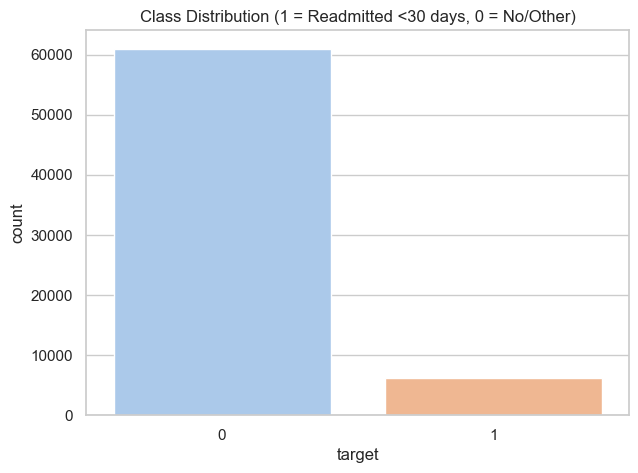


Target Class Imbalance:
Class 0 (Not Readmitted <30 days): 90.90%
Class 1 (Readmitted <30 days):     9.10%
This confirms a significant class imbalance, a key challenge for our model.

Analyzing Numerical Features
       time_in_hospital  num_lab_procedures  num_medications  \
count      67113.000000        67113.000000     67113.000000   
mean           4.301000           42.922653        15.768718   
std            2.941954           19.946970         8.265283   
min            1.000000            1.000000         1.000000   
25%            2.000000           31.000000        10.000000   
50%            4.000000           44.000000        14.000000   
75%            6.000000           57.000000        20.000000   
max           14.000000          132.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count       67113.000000      67113.000000      67113.000000      67113.000000  
mean            0.286398          0.106865     

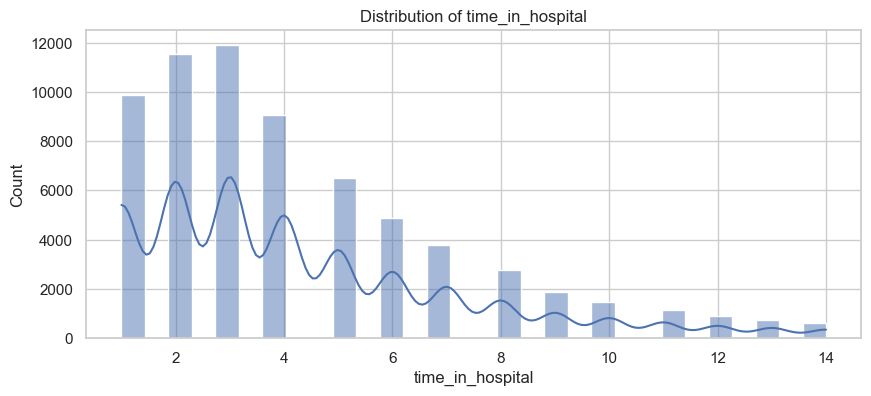

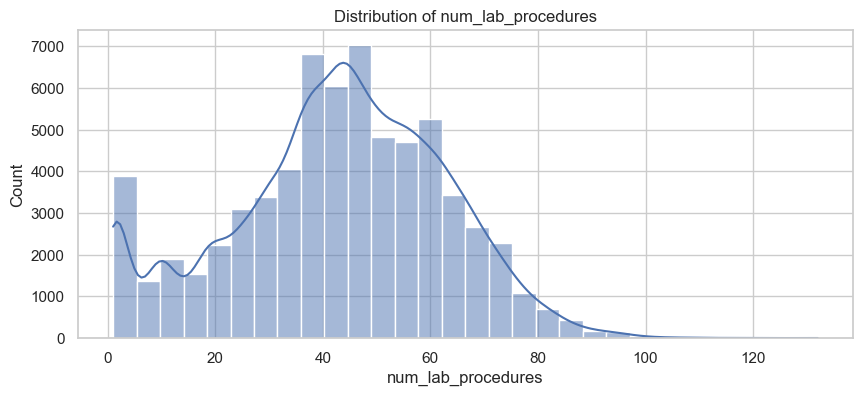

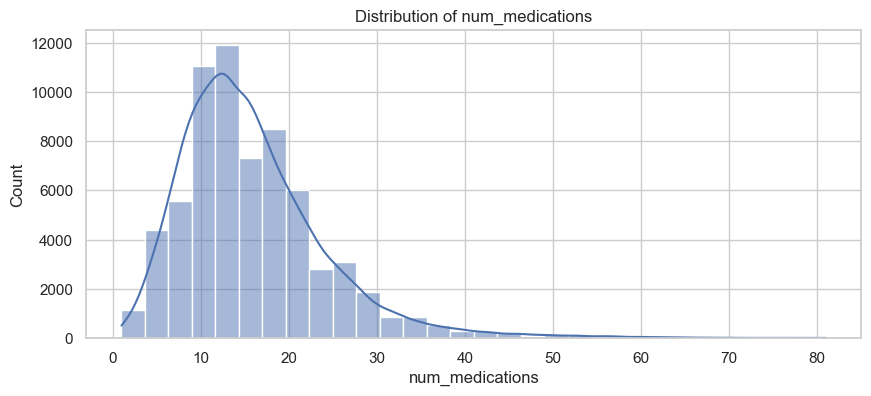

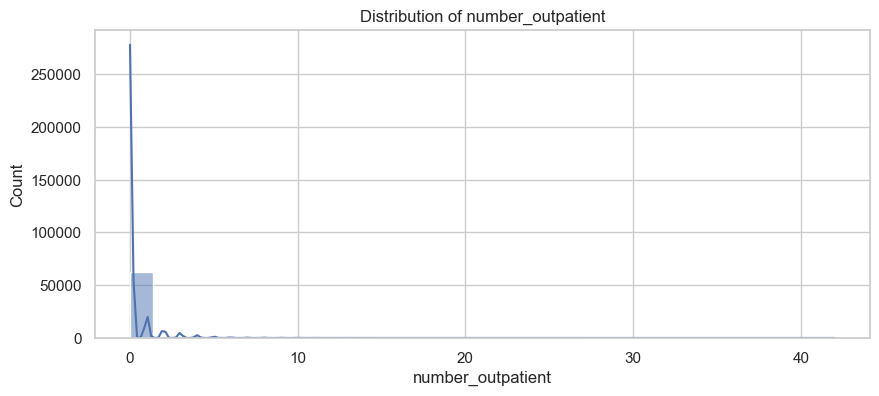

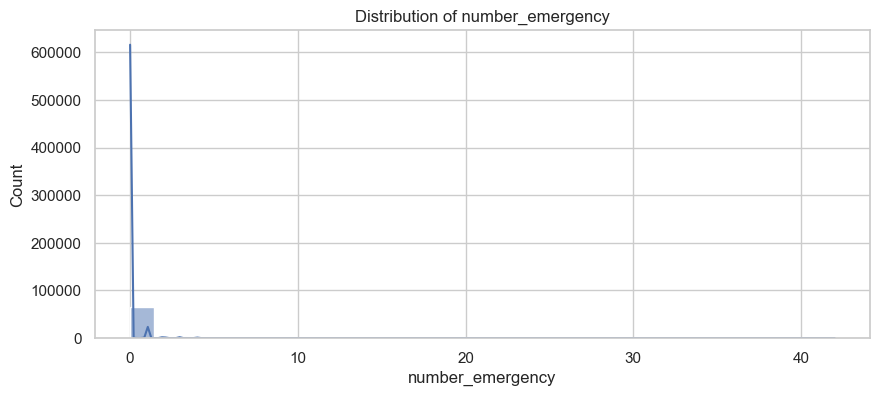

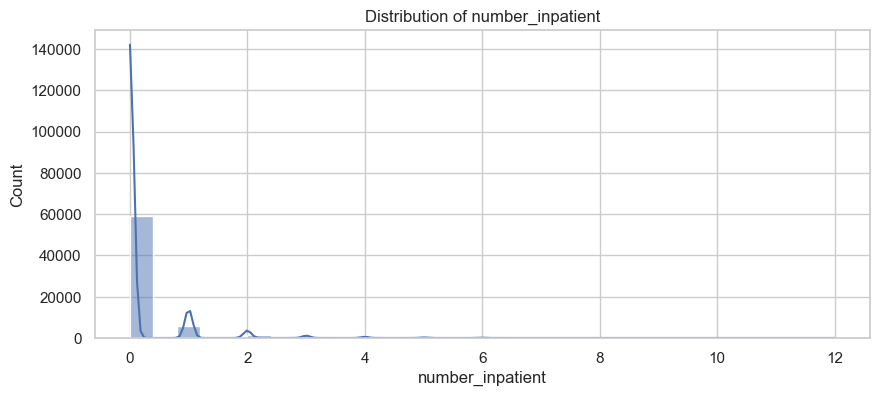

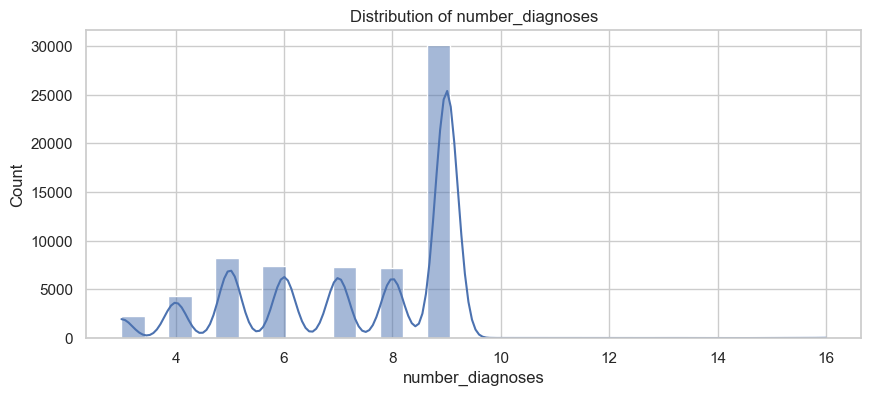


Numerical Features vs. Readmission Target


C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


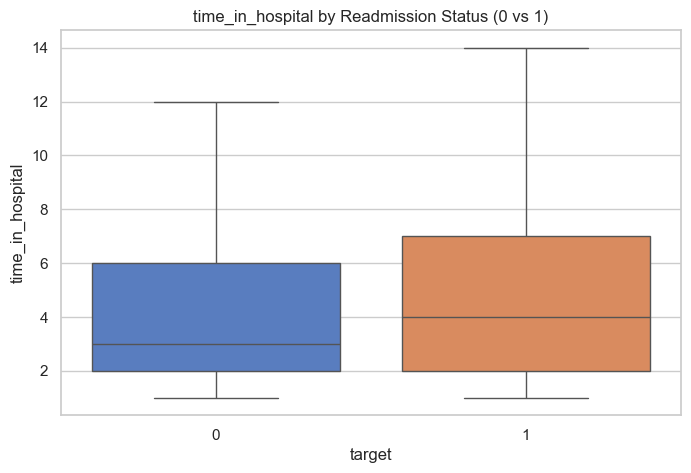

C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


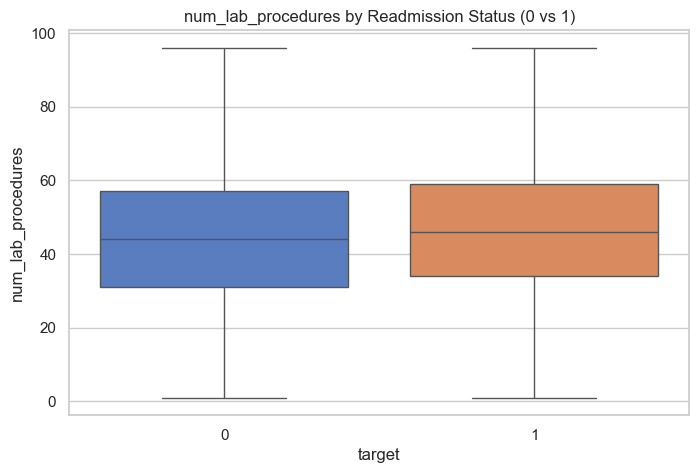

C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


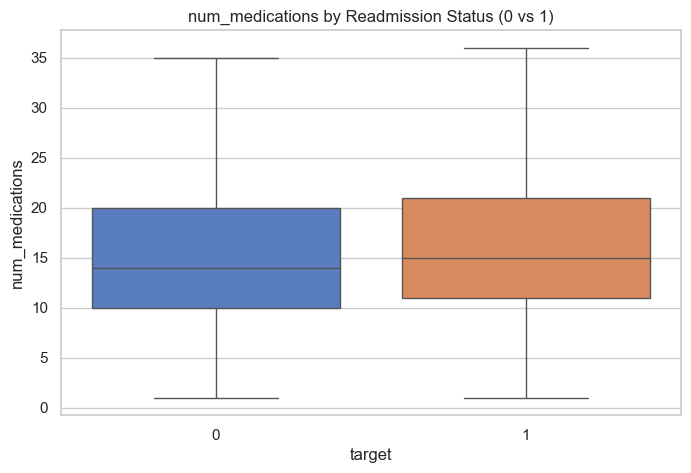

C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


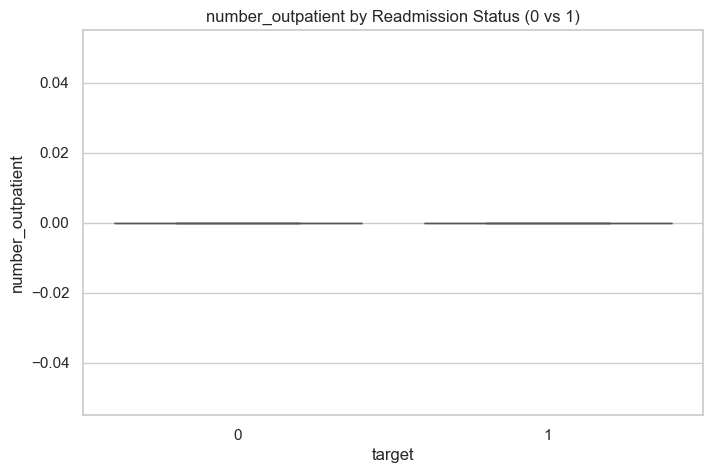

C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


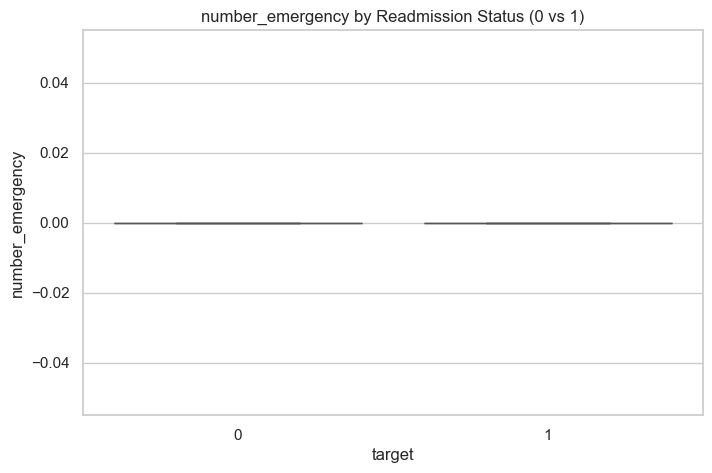

C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


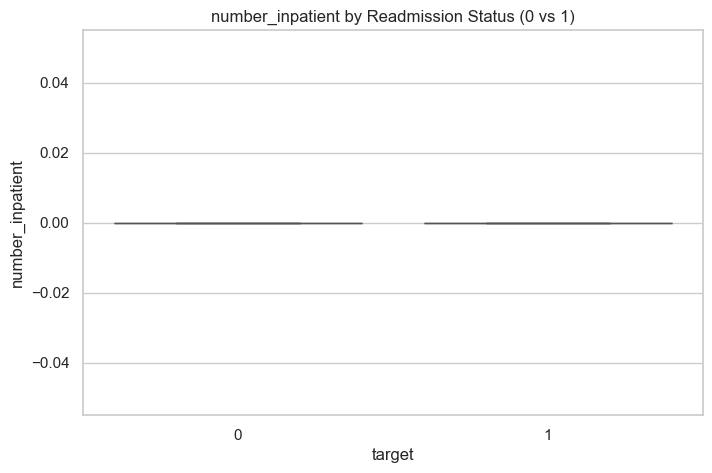

C:\Users\akars\AppData\Local\Temp\ipykernel_6240\985374405.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)


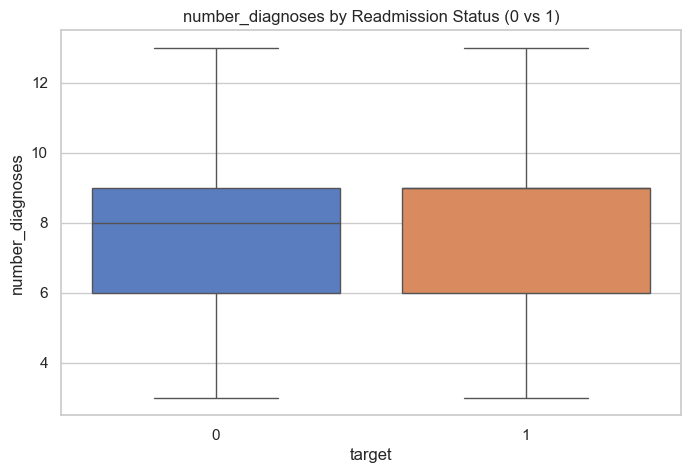


Analyzing Simple Categorical Features vs. Target


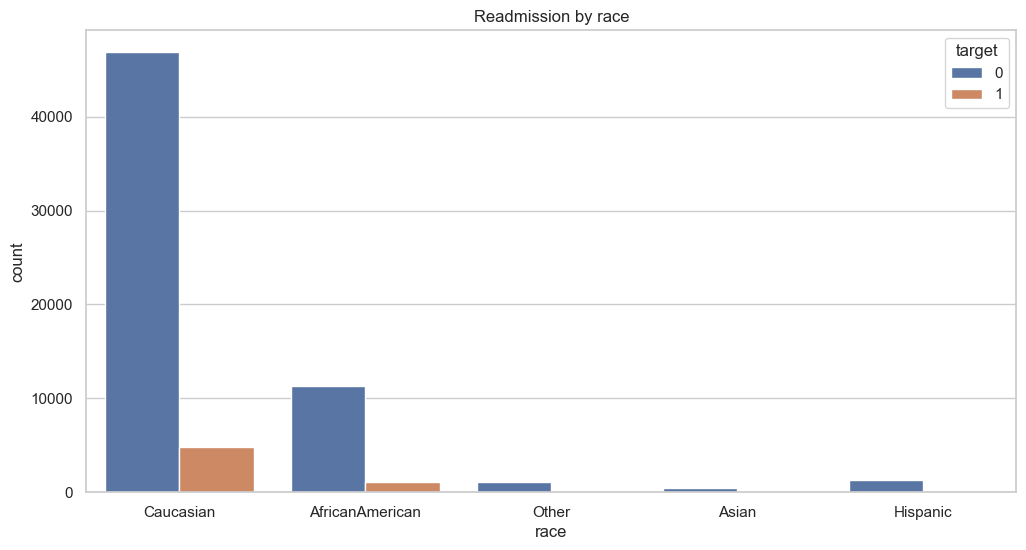

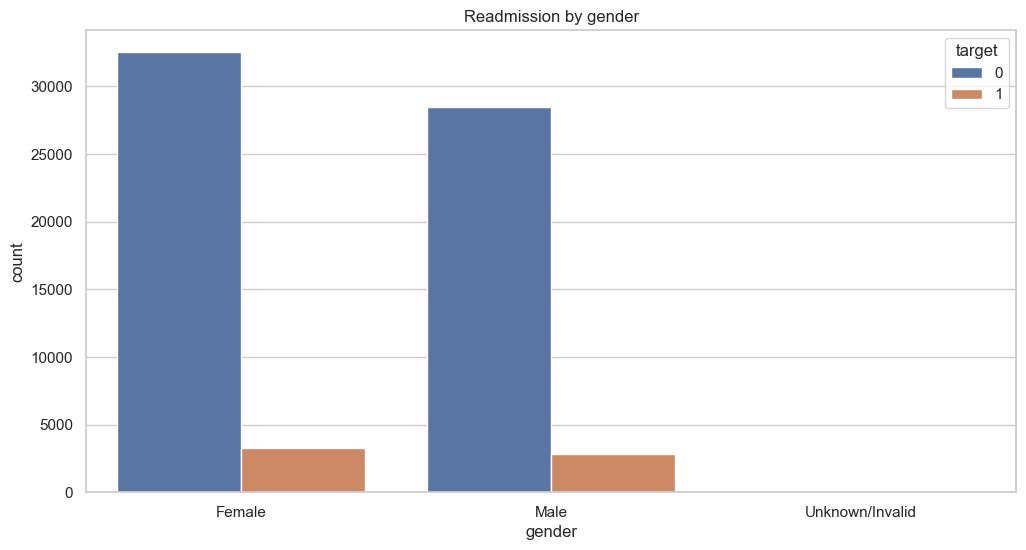

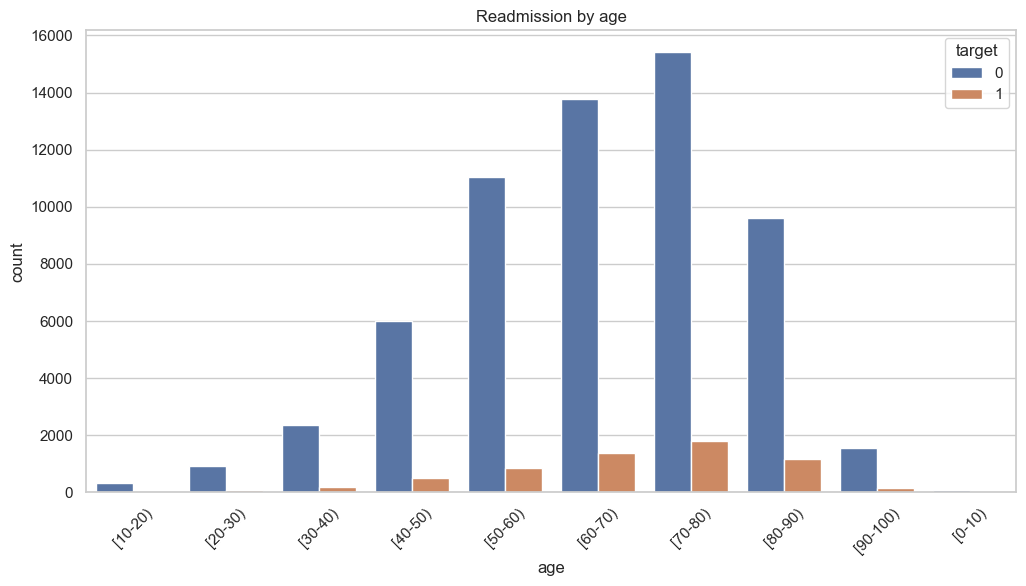


Analyzing Engineered Feature: 'primary_diag_group'


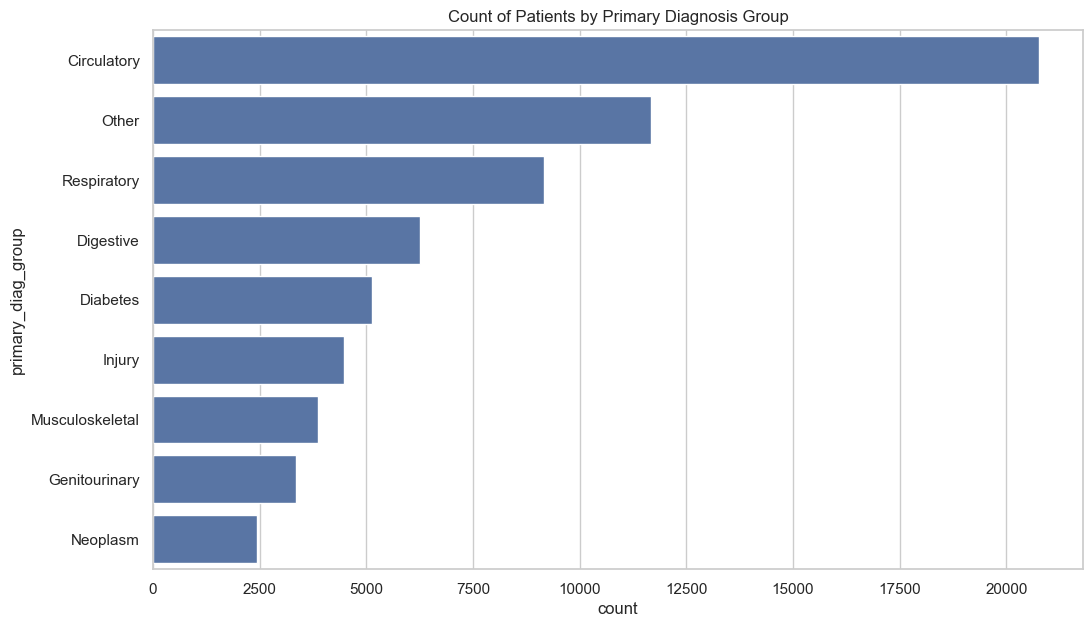

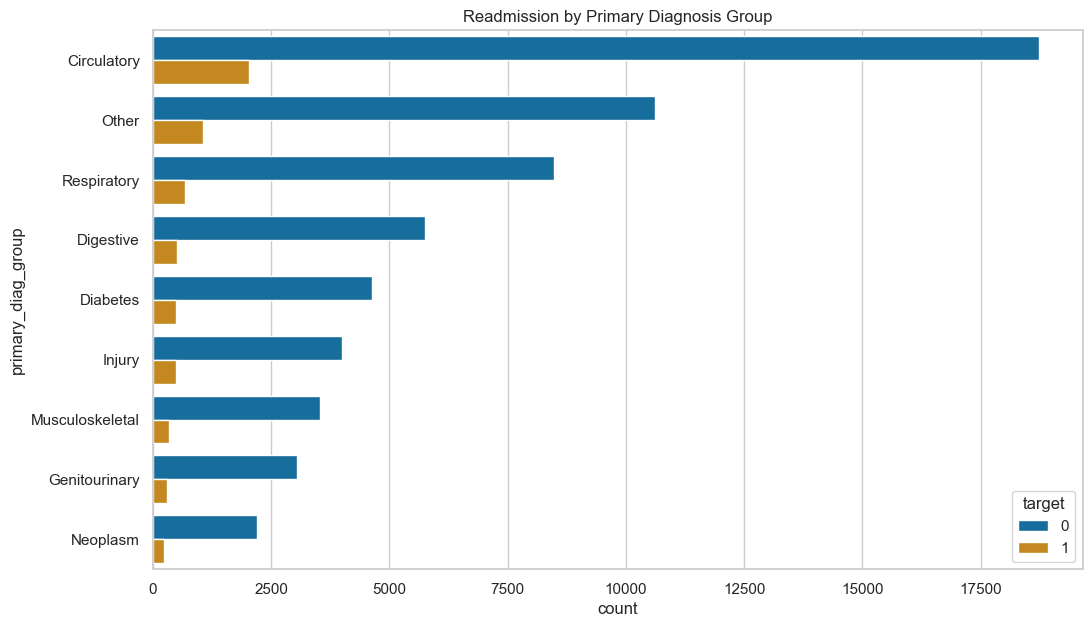


Analyzing Key Medication Features vs. Target: 


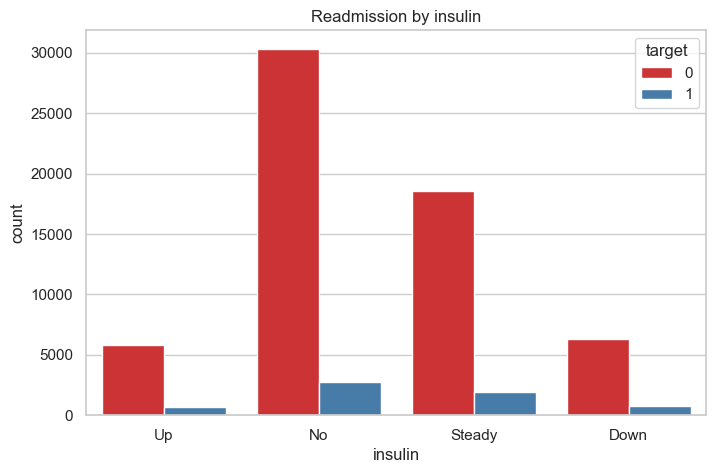

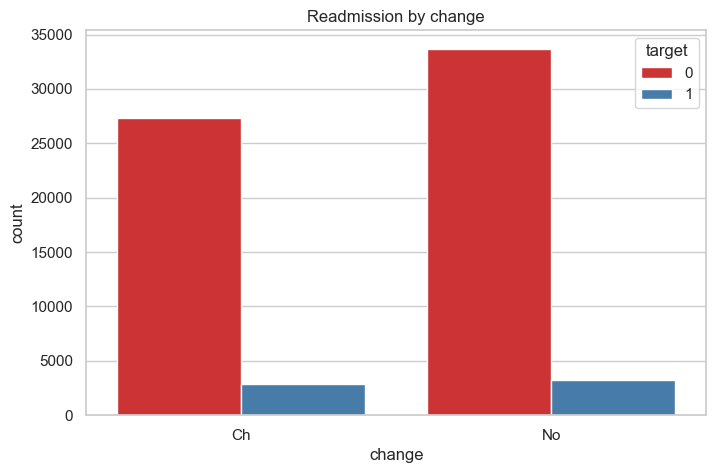

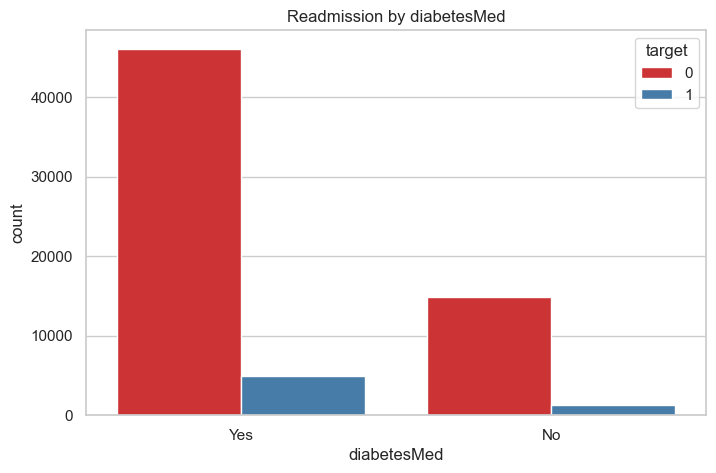


EDA Phase Complete: 
The data is now loaded, cleaned, explored, and has a new 'target' column.
Key findings: 
1. The dataset is highly imbalanced.
2. Features like 'number_inpatient', 'number_emergency', and 'time_in_hospital' show different distributions for readmitted patients.
3. Grouping diagnosis codes is a critical step for feature engineering.
The data is ready for the preprocessing (encoding) and modeling phase.


In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
# set plotting styles
%matplotlib inline
sns.set_theme(style="whitegrid")
print("Libraries imported successfully.")

print("Downloading Kaggle dataset: 'brandao/diabetes'")
path = kagglehub.dataset_download("brandao/diabetes")

print("Path to dataset files:", path)
file_path = os.path.join(path, 'diabetic_data.csv')

# the dataset uses '?' for missing values, so we specify na_values='?'
try:
    df = pd.read_csv(file_path, na_values='?')
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Check the download path.")

# handle missing data
# calculate the percentage of missing values for each column
missing_pct = (df.isnull().sum() / len(df)) * 100
print("\nColumns with Missing Data (Top 5): ")
print(missing_pct[missing_pct > 0].sort_values(ascending=False).head())

# drop columns with a high percentage of missing values
cols_to_drop = ['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty']
df = df.drop(cols_to_drop, axis=1)
print(f"\nDropped columns with high missing %: {cols_to_drop}")

# drop rows with a few missing values in key columns
df = df.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'])
print(f"Dropped rows with missing 'race' or 'diag' codes.")
print(f"Data shape after dropping NaNs: {df.shape}")

# duplicate and bias handling
print(f"\nTotal encounters (rows): {len(df)}")
print(f"Unique patients: {df['patient_nbr'].nunique()}")
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')
print(f"Data shape after keeping only first encounter: {df.shape}")

expired_ids = [11, 13, 14, 19, 20, 21]
df = df[~df['discharge_disposition_id'].isin(expired_ids)]
print(f"Removed patients who expired or went to hospice. New shape: {df.shape}")

# drop identifier columns that are not features
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)


print("\nAnalyzing the Target Variable ('readmitted')")
print("Original 'readmitted' column distribution:")
print(df['readmitted'].value_counts())

# create the binary target variable: 1 if '< 30', 0 otherwise
df['target'] = (df['readmitted'] == '<30').astype(int)

# plot the class imbalance
plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Class Distribution (1 = Readmitted <30 days, 0 = No/Other)')
plt.show()

# print the exact imbalance percentage
imbalance_pct = df['target'].value_counts(normalize=True) * 100
print(f"\nTarget Class Imbalance:")
print(f"Class 0 (Not Readmitted <30 days): {imbalance_pct[0]:.2f}%")
print(f"Class 1 (Readmitted <30 days):     {imbalance_pct[1]:.2f}%")
print("This confirms a significant class imbalance, a key challenge for our model.")


numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications',
                  'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

print(f"\nAnalyzing Numerical Features")
print(df[numerical_cols].describe())

# plot distributions for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


print("\nNumerical Features vs. Readmission Target")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=col, data=df, palette='muted', showfliers=False)
    plt.title(f'{col} by Readmission Status (0 vs 1)')
    plt.show()

categorical_cols = ['race', 'gender', 'age']

print(f"\nAnalyzing Simple Categorical Features vs. Target")
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='target', data=df, palette='deep')
    plt.title(f'Readmission by {col}')
    if col == 'age':
        plt.xticks(rotation=45)
    plt.show()

def group_diagnosis(code):
    if pd.isnull(code):
        return 'Other'

    # check for diabetes
    if code.startswith('250'):
        return 'Diabetes'

    # check for neoplasms
    if '140' <= code <= '239':
        return 'Neoplasm'

    try:
        val = float(code)
        if (390 <= val <= 459) or (val == 785):
            return 'Circulatory'
        if (460 <= val <= 519) or (val == 786):
            return 'Respiratory'
        if (520 <= val <= 579) or (val == 787):
            return 'Digestive'
        if 800 <= val <= 999:
            return 'Injury'
        if 710 <= val <= 739:
            return 'Musculoskeletal'
        if (580 <= val <= 629) or (val == 788):
            return 'Genitourinary'
    except ValueError:
        pass

    return 'Other'

df['primary_diag_group'] = df['diag_1'].apply(group_diagnosis)

print("\nAnalyzing Engineered Feature: 'primary_diag_group'")

# plot the distribution of new diagnosis groups
plt.figure(figsize=(12, 7))
sns.countplot(y='primary_diag_group', data=df, order=df['primary_diag_group'].value_counts().index)
plt.title('Count of Patients by Primary Diagnosis Group')
plt.show()

# plot new diagnosis groups against the target
plt.figure(figsize=(12, 7))
sns.countplot(y='primary_diag_group', hue='target', data=df,
              order=df['primary_diag_group'].value_counts().index, palette='colorblind')
plt.title('Readmission by Primary Diagnosis Group')
plt.show()

med_features = ['insulin', 'change', 'diabetesMed']

print(f"\nAnalyzing Key Medication Features vs. Target: ")
for col in med_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='target', data=df, palette='Set1')
    plt.title(f'Readmission by {col}')
    plt.show()

print("\nEDA Phase Complete: ")
print("The data is now loaded, cleaned, explored, and has a new 'target' column.")
print("Key findings: \n1. The dataset is highly imbalanced.")
print("2. Features like 'number_inpatient', 'number_emergency', and 'time_in_hospital' show different distributions for readmitted patients.")
print("3. Grouping diagnosis codes is a critical step for feature engineering.")
print("The data is ready for the preprocessing (encoding) and modeling phase.")

# save cleaned dataset
df.to_csv('cleaned_diabetic_data.csv', index=False)